In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load datasets
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

In [3]:
# Add labels
fake["label"] = 0  # Fake
real["label"] = 1  # Real

In [4]:
# Combine datasets
data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle

In [5]:
# Drop unnecessary columns
data = data.drop(columns=["subject", "date"], errors='ignore')

In [6]:
# Explore data
print("Dataset size:", data.shape)
print(data['label'].value_counts())

Dataset size: (44898, 3)
label
0    23481
1    21417
Name: count, dtype: int64


In [7]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42)

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [9]:
# Train Passive Aggressive Classifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [10]:
# Predict and evaluate
y_pred = model.predict(tfidf_test)

In [11]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9932071269487751

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4853
           1       0.99      0.99      0.99      4127

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



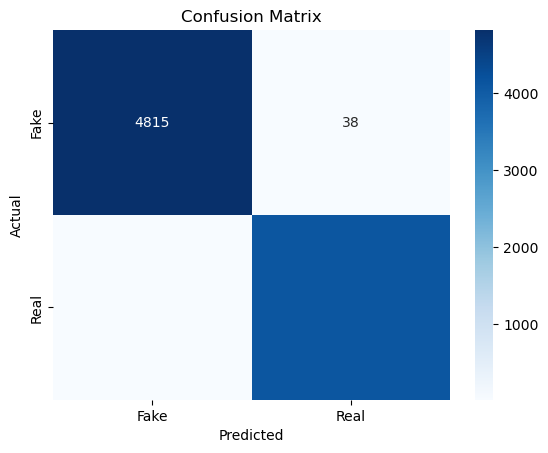

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()